In [36]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt

## Reading the data file
credit_card = pd.read_excel('default of credit card clients.xls', skiprows = 1)
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
## Splitting the data into train and test
train = credit_card.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
test = credit_card[~np.isin(credit_card['ID'], train['ID'])]

## Dropping ID 
train = train.drop(columns = 'ID', axis = 1)
test = test.drop(columns = 'ID', axis = 1)

test_target = test['default payment next month']
test = test.drop(columns = 'default payment next month', axis = 1)

## Writing the data to csv 
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)
test_target.to_csv('test_target.csv', index = False)

## Answering Questions

[Text(697.5, 713.475, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 19200\nvalue = [14953, 4247]'),
 Text(348.75, 509.625, 'PAY_2 <= 1.5\ngini = 0.279\nsamples = 17244\nvalue = [14353, 2891]'),
 Text(174.375, 305.775, 'PAY_AMT3 <= 390.5\ngini = 0.248\nsamples = 15797\nvalue = [13505, 2292]'),
 Text(87.1875, 101.92499999999995, 'gini = 0.35\nsamples = 3810\nvalue = [2950, 860]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.21\nsamples = 11987\nvalue = [10555, 1432]'),
 Text(523.125, 305.775, 'PAY_6 <= 1.0\ngini = 0.485\nsamples = 1447\nvalue = [848, 599]'),
 Text(435.9375, 101.92499999999995, 'gini = 0.463\nsamples = 1032\nvalue = [657, 375]'),
 Text(610.3125, 101.92499999999995, 'gini = 0.497\nsamples = 415\nvalue = [191, 224]'),
 Text(1046.25, 509.625, 'PAY_3 <= -0.5\ngini = 0.425\nsamples = 1956\nvalue = [600, 1356]'),
 Text(871.875, 305.775, 'PAY_AMT4 <= 1063.5\ngini = 0.498\nsamples = 115\nvalue = [61, 54]'),
 Text(784.6875, 101.92499999999995, 'gini = 0.489\nsamples = 80\nvalue = [34, 

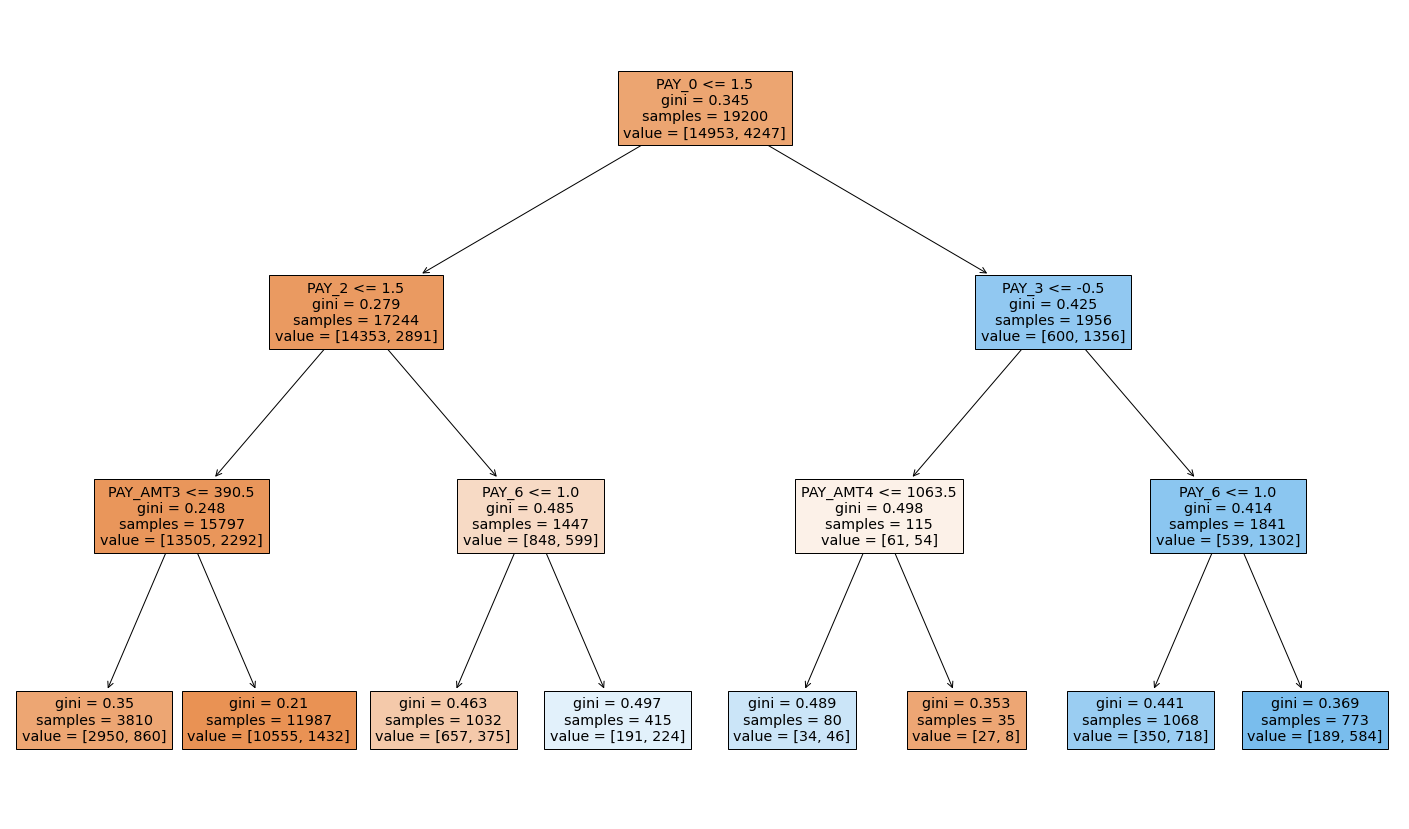

In [5]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## Reading data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ## Chaning labels
train['SEX'] = np.where(train['SEX'] == 1, 'male', 'female')
train['EDUCATION'] = np.where(train['EDUCATION'] == 1, 'graduate_school', 
                              np.where(train['EDUCATION'] == 2, 'university',
                                       np.where(train['EDUCATION'] == 3, 'high_school', 'other_unknown')))
train['MARRIAGE'] = np.where(train['MARRIAGE'] == 1, 'married', 
                             np.where(train['MARRIAGE'] == 2, 'single', 'other'))


test['SEX'] = np.where(test['SEX'] == 1, 'male', 'female')
test['EDUCATION'] = np.where(test['EDUCATION'] == 1, 'graduate_school', 
                              np.where(test['EDUCATION'] == 2, 'university',
                                       np.where(test['EDUCATION'] == 3, 'high_school', 'other_unknown')))
test['MARRIAGE'] = np.where(test['MARRIAGE'] == 1, 'married', 
                             np.where(test['MARRIAGE'] == 2, 'single', 'other'))

## Creating ID columns
train['ID'] = list(range(1, train.shape[0] + 1))

## Splitting the data into train and test
training = train.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
testing = train[~np.isin(train['ID'], training['ID'])]

## Dropping ID
training = training.drop(columns = 'ID', axis = 1)
testing = testing.drop(columns = 'ID', axis = 1)

## Defining inputs and target variables
X = training.drop(columns = 'default payment next month', axis = 1).reset_index(drop = True)
Y = training['default payment next month'].reset_index(drop = True)

## Changing labels to dummies 
X = pd.concat([X.drop(columns = 'SEX', axis = 1), pd.get_dummies(X['SEX'])], axis = 1)
X = pd.concat([X.drop(columns = 'EDUCATION', axis = 1), pd.get_dummies(X['EDUCATION'])], axis = 1)
X = pd.concat([X.drop(columns = 'MARRIAGE', axis = 1), pd.get_dummies(X['MARRIAGE'])], axis = 1)

## Engineering features via decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X, Y)

## Visualizing the decision-tree model 
fig = plt.figure(figsize = (25, 15))
plot_tree(tree_md, feature_names = X.columns, filled = True)

[Text(697.5, 713.475, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 19200\nvalue = [14953, 4247]'),
 Text(348.75, 509.625, 'PAY_2 <= 1.5\ngini = 0.278\nsamples = 17218\nvalue = [14349, 2869]'),
 Text(174.375, 305.775, 'PAY_AMT3 <= 395.0\ngini = 0.246\nsamples = 15755\nvalue = [13487, 2268]'),
 Text(87.1875, 101.92499999999995, 'gini = 0.347\nsamples = 3784\nvalue = [2937, 847]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.209\nsamples = 11971\nvalue = [10550, 1421]'),
 Text(523.125, 305.775, 'PAY_5 <= 1.0\ngini = 0.484\nsamples = 1463\nvalue = [862, 601]'),
 Text(435.9375, 101.92499999999995, 'gini = 0.462\nsamples = 1023\nvalue = [652, 371]'),
 Text(610.3125, 101.92499999999995, 'gini = 0.499\nsamples = 440\nvalue = [210, 230]'),
 Text(1046.25, 509.625, 'PAY_3 <= -0.5\ngini = 0.424\nsamples = 1982\nvalue = [604, 1378]'),
 Text(871.875, 305.775, 'PAY_AMT4 <= 1268.5\ngini = 0.498\nsamples = 125\nvalue = [66, 59]'),
 Text(784.6875, 101.92499999999995, 'gini = 0.488\nsamples = 92\nvalue = [39

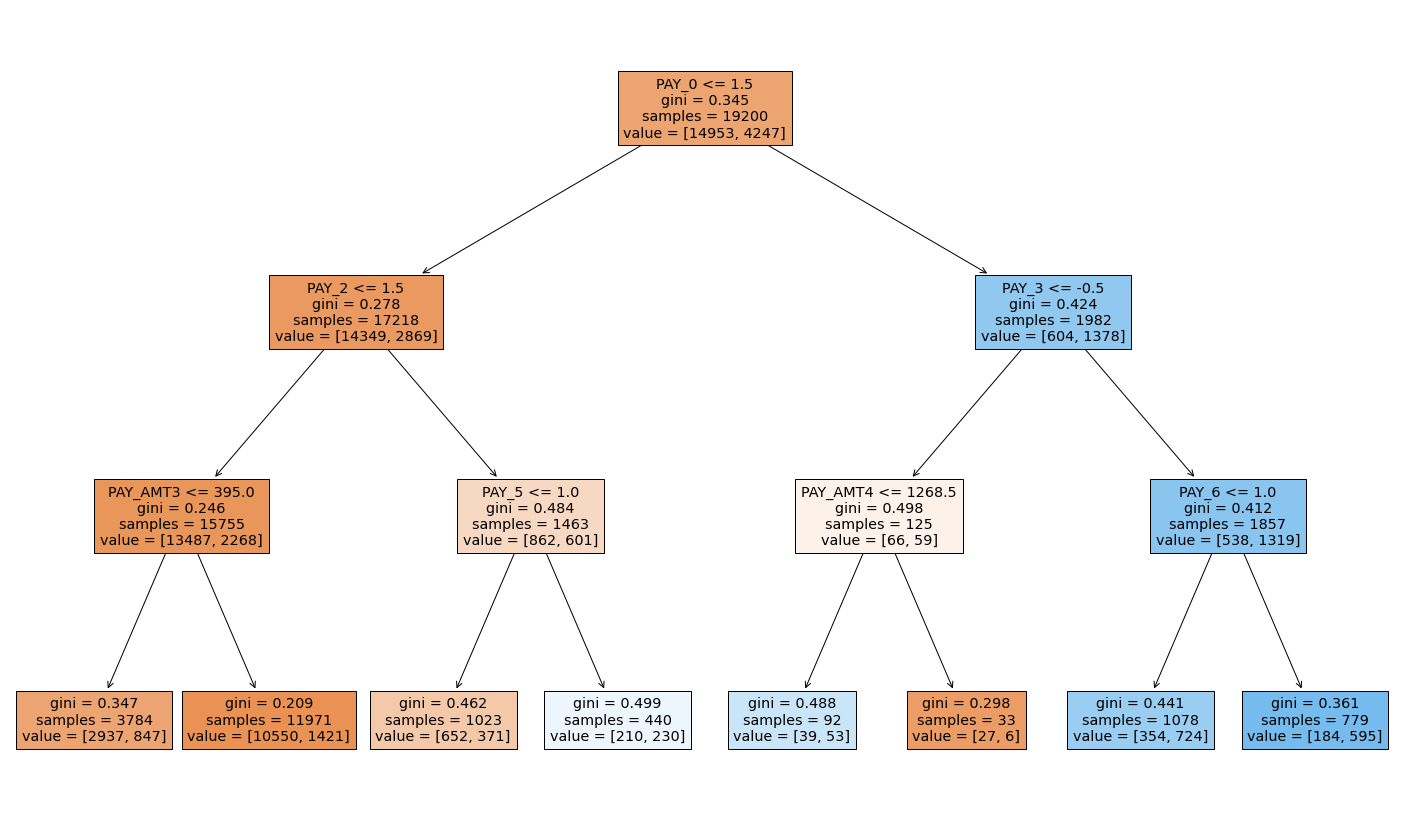

In [6]:
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## Reading data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ## Chaning labels
train['SEX'] = np.where(train['SEX'] == 1, 'male', 'female')
train['EDUCATION'] = np.where(train['EDUCATION'] == 1, 'graduate_school', 
                              np.where(train['EDUCATION'] == 2, 'university',
                                       np.where(train['EDUCATION'] == 3, 'high_school', 'other_unknown')))
train['MARRIAGE'] = np.where(train['MARRIAGE'] == 1, 'married', 
                             np.where(train['MARRIAGE'] == 2, 'single', 'other'))


test['SEX'] = np.where(test['SEX'] == 1, 'male', 'female')
test['EDUCATION'] = np.where(test['EDUCATION'] == 1, 'graduate_school', 
                              np.where(test['EDUCATION'] == 2, 'university',
                                       np.where(test['EDUCATION'] == 3, 'high_school', 'other_unknown')))
test['MARRIAGE'] = np.where(test['MARRIAGE'] == 1, 'married', 
                             np.where(test['MARRIAGE'] == 2, 'single', 'other'))

## Creating ID columns
train['ID'] = list(range(1, train.shape[0] + 1))

## Splitting the data into train and test
training = train.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
testing = train[~np.isin(train['ID'], training['ID'])]

## Dropping ID
training = training.drop(columns = 'ID', axis = 1)
testing = testing.drop(columns = 'ID', axis = 1)

## Defining inputs and target variables
X = training.drop(columns = 'default payment next month', axis = 1).reset_index(drop = True)
Y = training['default payment next month'].reset_index(drop = True)

## Changing labels to dummies 
X = pd.concat([X.drop(columns = 'SEX', axis = 1), pd.get_dummies(X['SEX'])], axis = 1)
X = pd.concat([X.drop(columns = 'EDUCATION', axis = 1), pd.get_dummies(X['EDUCATION'])], axis = 1)
X = pd.concat([X.drop(columns = 'MARRIAGE', axis = 1), pd.get_dummies(X['MARRIAGE'])], axis = 1)

## Engineering features via decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X, Y)

## Visualizing the decision-tree model 
fig = plt.figure(figsize = (25, 15))
plot_tree(tree_md, feature_names = X.columns, filled = True)

In [18]:
## Strong heredity
importance_results = list()

for i in range(0, 20):
    print(i)
    ## Building RF model
    RF = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X, Y)
    
    ## Extracting and storting importance
    importance_results.append(RF.feature_importances_)
    
## Converting list to data-frame
importance_results = pd.DataFrame(importance_results)
importance_results.columns = X.columns

## Sorting based on average importance
importance_results = importance_results.apply(np.mean, axis = 0).sort_values(ascending = False)
importance_results

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


PAY_0              0.320601
PAY_2              0.200332
PAY_3              0.122125
PAY_4              0.086110
PAY_5              0.081917
PAY_6              0.058464
PAY_AMT1           0.030935
LIMIT_BAL          0.025249
PAY_AMT2           0.016673
PAY_AMT3           0.013929
PAY_AMT4           0.008671
PAY_AMT5           0.008312
PAY_AMT6           0.007687
BILL_AMT2          0.004033
BILL_AMT1          0.003405
BILL_AMT4          0.002521
BILL_AMT5          0.002371
BILL_AMT3          0.002065
BILL_AMT6          0.001931
AGE                0.000670
graduate_school    0.000447
married            0.000368
other_unknown      0.000359
single             0.000341
male               0.000128
female             0.000122
high_school        0.000112
university         0.000066
other              0.000056
dtype: float64

In [ ]:
## Computing strong heredeity interactions
X['interaction_1'] = X['PAY_0'] * X['PAY_2'] 
X['interaction_2'] = X['PAY_0'] * X['PAY_3']
X['interaction_3'] = X['PAY_2'] * X['PAY_3']